In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
import IPython.display
import librosa
import librosa.display
#https://musicinformationretrieval.com/ipython_audio.html

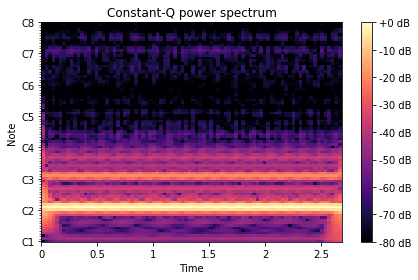

In [4]:
x50, sr = librosa.load('o25.wav', sr = 16000, mono = 'True')
x70, sr = librosa.load('o84.wav', sr = 16000, mono = 'True')
C50 = np.abs(librosa.cqt(x50[:int(2.68*sr)], sr=sr, n_bins=84))
C70 = np.abs(librosa.cqt(x70[:int(2.68*sr)], sr=sr))
librosa.display.specshow(librosa.amplitude_to_db(C50, ref=np.max),sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()

(84, 84)


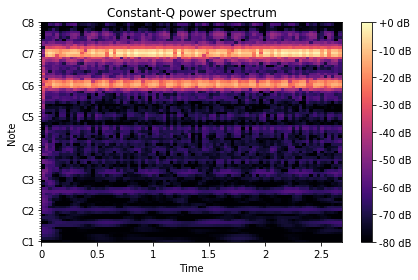

In [5]:
librosa.display.specshow(librosa.amplitude_to_db(C70, ref=np.max),sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()

print (np.shape(C50))

# Feature extractor

In [38]:
# implement iterator to load wav files into x 

import os,glob,h5py
cqarray = np.zeros((1,84,84))
os.chdir(os.getcwd())
filenames = glob.glob("*.wav")
# print (filenames)
for i in range(len(filenames)):
    x,sr = librosa.load(filenames[i], sr = 16000, mono = 'True')
    c = np.abs(librosa.cqt(x[:int(2.68*sr)], sr=sr, n_bins=84))
    c = np.reshape(c,(1,84,84))
    cqarray = np.append(cqarray,c,0)
    
h5f = h5py.File('train_data.h5','w')
h5f.create_dataset('train',data = cqarray)

<HDF5 dataset "train": shape (6, 84, 84), type "<f8">

In [35]:

np.shape(cqarray)

(6, 84, 84)